# SALES TRANSACTION ASSIGNMENT

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Data Source (sales_transactions).csv")
df.head(10)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0
5,6,1001.0,NaN,2007,Home Decor,1,NaN,NaN,20,Credit Card,NaN
6,7,1001.0,01/08/24 13:00,2007,Home Decor,-1,30.0,-30.0,-10,NaN,NaN
7,8,1005.0,04/08/24 22:00,2006,Toys,1,50.0,50.0,-10,Trust Points,30.0
8,9,1004.0,02/08/24 23:00,2008,Fashion,1,NaN,NaN,-10,NaN,NaN
9,10,1004.0,01/08/24 14:00,2005,Fashion,2,500.0,1000.0,-10,Cash,30.0


## Exploratory Data Analysis

In [3]:
df.shape

(50, 11)

The Dataset has 50 rows and 11 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB


In [5]:
df.isnull().sum()

TransactionID       0
CustomerID          5
TransactionDate     1
ProductID           0
ProductCategory     0
Quantity            0
PricePerUnit       14
TotalAmount        14
TrustPointsUsed     0
PaymentMethod      10
DiscountApplied     5
dtype: int64

Missing Data:

- There are 5 null values in CustomerID column.
- There is 1 missing Transaction Date.
- There are 14 missing values in the TotalAmount & PricePerUnit column.
- There are 10 null values in the PaymentMethod column.
- There are 5 missing values in DiscountApplied column.

The TransactionDate is of data type "object". So, we will change the data type to "datetime".

In [6]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = 'mixed', dayfirst=True)

In [7]:
df.head(5)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,2024-08-07 01:00:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,2024-08-02 19:00:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,2024-08-07 17:00:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,2024-08-09 09:00:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [8]:
df.dtypes

TransactionID               int64
CustomerID                float64
TransactionDate    datetime64[ns]
ProductID                   int64
ProductCategory            object
Quantity                    int64
PricePerUnit              float64
TotalAmount               float64
TrustPointsUsed             int64
PaymentMethod              object
DiscountApplied           float64
dtype: object

In [9]:
df['NewTransactionID'] = df.index + 1
df.drop(columns=['TransactionID'], inplace=True)
df.rename(columns={'NewTransactionID': 'TransactionID'}, inplace=True)

In [10]:
df.head(2)

,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,TransactionID
0,1002.0,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0,1
1,NaN,2024-08-07 01:00:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0,2


In [11]:
df.insert(0, 'TransactionID', df.pop('TransactionID'))

In [12]:
df.head(2)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,2024-08-07 01:00:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0


In [13]:
df.describe()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,DiscountApplied
count,50.00000,45.000000,49,50.000000,50.000000,36.000000,36.000000,50.000000,45.000000
mean,25.50000,1002.444444,2024-08-05 15:31:50.204081920,2004.920000,1.420000,125.277778,155.277778,28.800000,23.888889
min,1.00000,1001.000000,2024-08-01 04:00:00,2001.000000,-1.000000,10.000000,-500.000000,-10.000000,5.000000
25%,13.25000,1001.000000,2024-08-02 20:00:00,2003.000000,1.000000,17.500000,10.000000,0.000000,15.000000
50%,25.50000,1002.000000,2024-08-06 02:00:00,2005.000000,1.000000,30.000000,40.000000,20.000000,20.000000
75%,37.75000,1003.000000,2024-08-07 18:00:00,2007.000000,2.000000,100.000000,150.000000,50.000000,30.000000
max,50.00000,1005.000000,2024-08-10 00:00:00,2008.000000,5.000000,500.000000,1500.000000,100.000000,50.000000
std,14.57738,1.306549,NaN,2.284285,1.263135,188.292874,351.596247,39.467889,13.853490


Checking data distribution using histogram and boxplot:

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram')

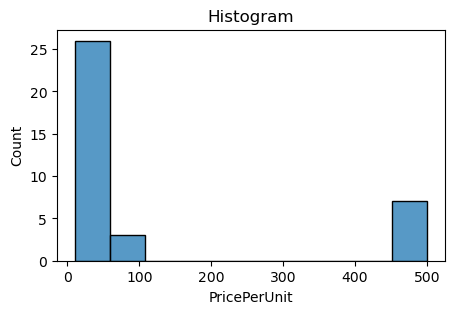

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='PricePerUnit')
plt.title('Histogram')

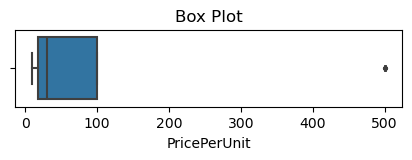

In [15]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['PricePerUnit'], fliersize=3)
plt.title('Box Plot');

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram')

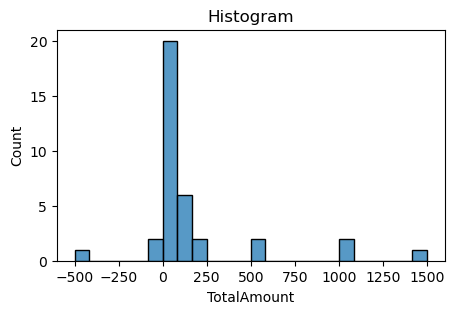

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='TotalAmount')
plt.title('Histogram')

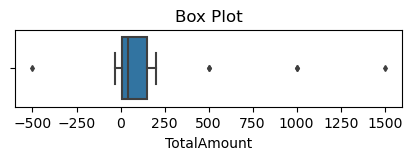

In [17]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['TotalAmount'], fliersize=3)
plt.title('Box Plot');

- As the PricePerUnit column has outliers, we will use median to fill in the null data.
- As the TotalAmount column has normal distribution, we will mean use mean to replace the null values.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram')

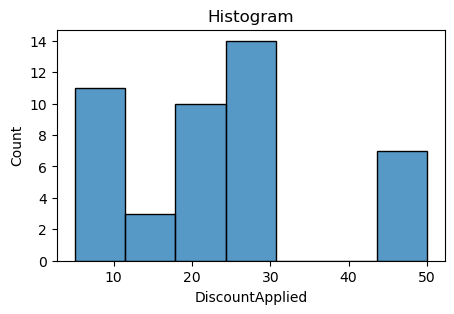

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='DiscountApplied')
plt.title('Histogram')

In [60]:
df['PricePerUnit'].fillna(df['PricePerUnit'].median(), inplace=True)

In [62]:
df['TotalAmount'].fillna(df['TotalAmount'].mean(), inplace=True)

In [21]:
df['DiscountApplied'].fillna(0, inplace=True)

In [22]:
df['CustomerID'] = df['CustomerID'].astype('object')

In [23]:
df['CustomerID'].fillna('NoID', inplace=True)

In [25]:
total_customers = df['CustomerID'].nunique()
total_customers

6

In [26]:
total_products = df['ProductID'].nunique()
total_products

8

In [27]:
total_product_category = df['ProductCategory'].nunique()
total_product_category

5

In [28]:
total_ordered = df[df['Quantity'] > 0]['Quantity'].sum()
total_ordered

75

In [29]:
total_returned = abs(df[df['Quantity'] < 0]['Quantity'].sum())
total_returned

4

In [30]:
final_quantity_sold = total_ordered-total_returned
final_quantity_sold

71

In [31]:
Avg_price_per_unit = df['PricePerUnit'].mean()
Avg_price_per_unit

98.6

In [32]:
Amount_received = df[df['TotalAmount'] > 0]['TotalAmount'].sum()
Amount_received

8303.888888888889

In [33]:
Amount_reverted = abs(df[df['TotalAmount'] < 0]['TotalAmount'].sum())
Amount_reverted

540.0

In [34]:
Total_sales = Amount_received-Amount_reverted
Total_sales

7763.888888888889

In [35]:
Product_summary = df.groupby('ProductCategory').agg({
    'Quantity': 'sum', 'TotalAmount': 'sum', 'PricePerUnit': 'mean'}).reset_index().sort_values(by='TotalAmount')
Product_summary

,ProductCategory,Quantity,TotalAmount,PricePerUnit
0,Electronics,12,670.555556,136.923077
2,Grocery,19,941.111111,35.000000
4,Toys,21,1150.555556,42.307692
3,Home Decor,10,2485.833333,118.000000
1,Fashion,9,2515.833333,190.000000


In [36]:
customer_summary = df.groupby('CustomerID').agg({
    'TransactionID': 'count', 'Quantity': 'sum', 'TotalAmount': 'sum', 'DiscountApplied': 'sum'}).reset_index()
customer_summary

,CustomerID,TransactionID,Quantity,TotalAmount,DiscountApplied
0,1001.0,15,23,1431.111111,205.0
1,1002.0,9,13,1061.111111,205.0
2,1003.0,10,14,2880.555556,255.0
3,1004.0,8,12,1615.833333,185.0
4,1005.0,3,5,235.277778,130.0
5,NoID,5,4,540.000000,95.0


In [37]:
payment_methods = df['PaymentMethod'].value_counts(dropna=False)
payment_methods

PaymentMethod
Cash            16
Trust Points    14
Credit Card     10
NaN             10
Name: count, dtype: int64

In [38]:
sales_trend = df.groupby('TransactionDate')['TotalAmount'].sum().reset_index()
sales_trend

,TransactionDate,TotalAmount
0,2024-08-01 04:00:00,155.277778
1,2024-08-01 08:00:00,60.000000
2,2024-08-01 13:00:00,-30.000000
3,2024-08-01 14:00:00,1010.000000
4,2024-08-01 23:00:00,50.000000
5,2024-08-02 03:00:00,155.277778
6,2024-08-02 08:00:00,1000.000000
7,2024-08-02 15:00:00,30.000000
8,2024-08-02 16:00:00,70.000000
9,2024-08-02 19:00:00,90.000000


In [39]:
import datetime as dt
df['Week'] = df.TransactionDate.dt.isocalendar().week
df['WeekDay'] = df.TransactionDate.dt.day_name()
df.head(5)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,Week,WeekDay
0,1,1002.0,2024-08-08 22:00:00,2008,Grocery,1,10.0,10.000000,20,Trust Points,5.0,32,Thursday
1,2,NoID,2024-08-07 01:00:00,2004,Home Decor,1,10.0,10.000000,0,Credit Card,20.0,32,Wednesday
2,3,1004.0,2024-08-02 19:00:00,2002,Grocery,3,30.0,90.000000,0,Credit Card,25.0,31,Friday
3,4,1003.0,2024-08-07 17:00:00,2001,Toys,2,30.0,60.000000,50,NaN,20.0,32,Wednesday
4,5,1001.0,2024-08-09 09:00:00,2008,Grocery,1,30.0,155.277778,20,Trust Points,5.0,32,Friday


In [40]:
sales_trend_by_day = df.groupby('WeekDay')['TotalAmount'].sum().reset_index()
sales_trend_by_day

,WeekDay,TotalAmount
0,Friday,2672.222222
1,Monday,1500.000000
2,Saturday,805.277778
3,Sunday,375.277778
4,Thursday,1560.555556
5,Tuesday,385.277778
6,Wednesday,310.000000


## Data Validation

In [66]:
# Validating calculated fields
df['CalculatedTotal'] = df['Quantity'] * df['PricePerUnit']
df['Validation'] = np.where(df['CalculatedTotal'] == df['TotalAmount'], True, False)

df.drop(columns=['CalculatedTotal', 'Validation'], inplace=True)

In [41]:
#checking for duplicates
duplicate = df[df.duplicated(['TransactionID'], keep=False)]
duplicate

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,Week,WeekDay


No Duplicates found

In [64]:
df.describe()

,TransactionID,TransactionDate,ProductID,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,DiscountApplied,Week
count,50.00000,49,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,49.0
mean,25.50000,2024-08-05 15:31:50.204081920,2004.920000,1.420000,98.600000,155.277778,28.800000,21.500000,31.530612
min,1.00000,2024-08-01 04:00:00,2001.000000,-1.000000,10.000000,-500.000000,-10.000000,0.000000,31.0
25%,13.25000,2024-08-02 20:00:00,2003.000000,1.000000,30.000000,20.000000,0.000000,10.000000,31.0
50%,25.50000,2024-08-06 02:00:00,2005.000000,1.000000,30.000000,95.000000,20.000000,20.000000,32.0
75%,37.75000,2024-08-07 18:00:00,2007.000000,2.000000,50.000000,155.277778,50.000000,30.000000,32.0
max,50.00000,2024-08-10 00:00:00,2008.000000,5.000000,500.000000,1500.000000,100.000000,50.000000,32.0
std,14.57738,NaN,2.284285,1.263135,164.899598,297.153064,39.467889,14.991494,0.504234


In [42]:
df.dtypes

TransactionID               int64
CustomerID                 object
TransactionDate    datetime64[ns]
ProductID                   int64
ProductCategory            object
Quantity                    int64
PricePerUnit              float64
TotalAmount               float64
TrustPointsUsed             int64
PaymentMethod              object
DiscountApplied           float64
Week                       UInt32
WeekDay                    object
dtype: object

In [43]:
negative_values = df[(df['Quantity'] < 0) | (df['TotalAmount'] < 0)]
negative_values

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,Week,WeekDay
6,7,1001.0,2024-08-01 13:00:00,2007,Home Decor,-1,30.0,-30.000000,-10,NaN,0.0,31,Thursday
34,35,NoID,2024-08-06 08:00:00,2002,Electronics,-1,500.0,-500.000000,100,Trust Points,30.0,32,Tuesday
38,39,1004.0,2024-08-06 18:00:00,2007,Home Decor,-1,10.0,-10.000000,20,Credit Card,20.0,32,Tuesday
48,49,1003.0,2024-08-06 14:00:00,2007,Electronics,-1,30.0,155.277778,0,Cash,20.0,32,Tuesday


Total Returned orders were 4. Hence, validated.

## Data Visualisation

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


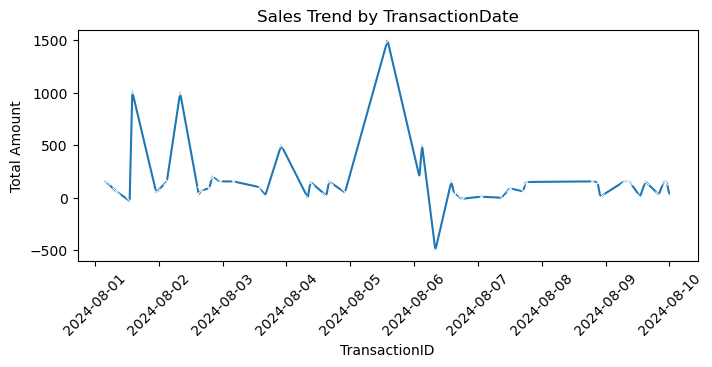

In [44]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=sales_trend, x='TransactionDate', y='TotalAmount', marker='x')
plt.title('Sales Trend by TransactionDate')
plt.xlabel('TransactionID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


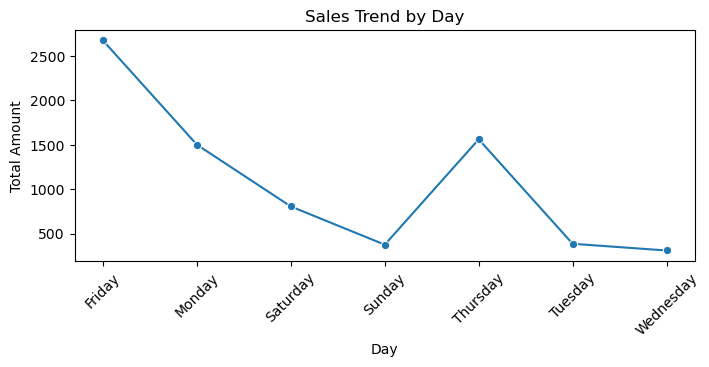

In [45]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=sales_trend_by_day, x='WeekDay', y='TotalAmount', marker='o')
plt.title('Sales Trend by Day')
plt.xlabel('Day')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [46]:
payment_percentages = payment_methods / payment_methods.sum() * 100

In [47]:
payment_method = df['PaymentMethod'].unique()

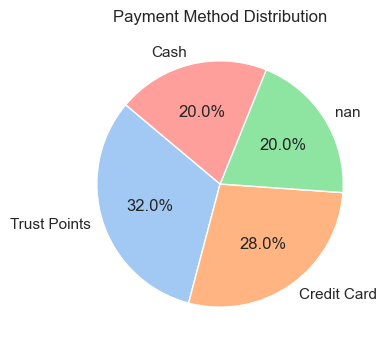

In [48]:
labels = payment_method
sizes = payment_percentages.values
colors = sns.color_palette('pastel')[0:len(labels)]

sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.show()

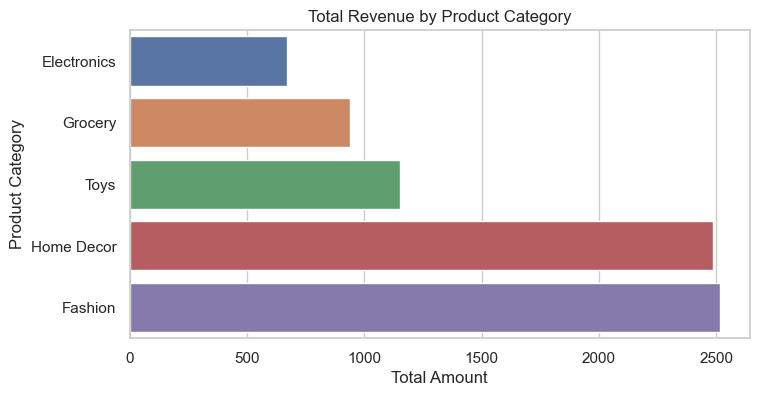

In [49]:
plt.figure(figsize=(8, 4))
sns.barplot(x='TotalAmount', y='ProductCategory', data=Product_summary)
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.title('Total Revenue by Product Category')
plt.show()

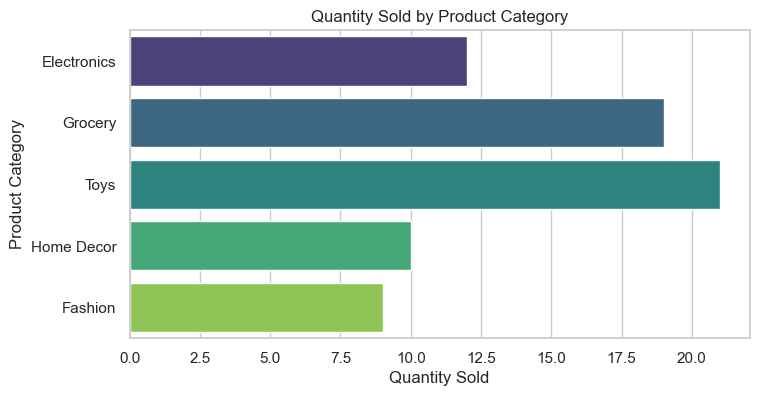

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Quantity', y='ProductCategory', data=Product_summary, palette='viridis')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.title('Quantity Sold by Product Category')
plt.show()

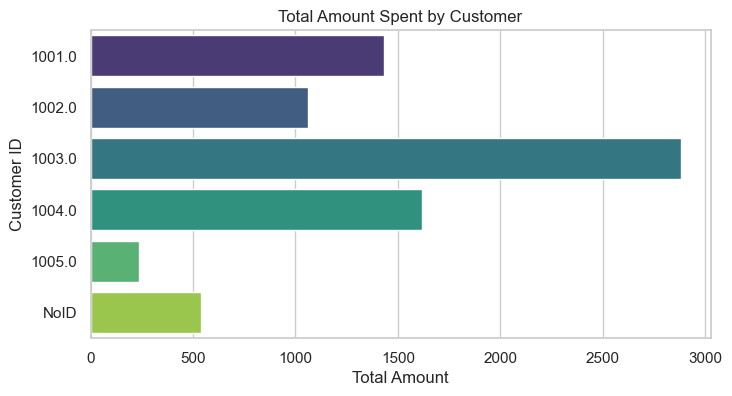

In [51]:
plt.figure(figsize=(8, 4))
sns.barplot(x='TotalAmount', y='CustomerID', data=customer_summary, palette='viridis')
plt.xlabel('Total Amount')
plt.ylabel('Customer ID')
plt.title('Total Amount Spent by Customer')
plt.show()


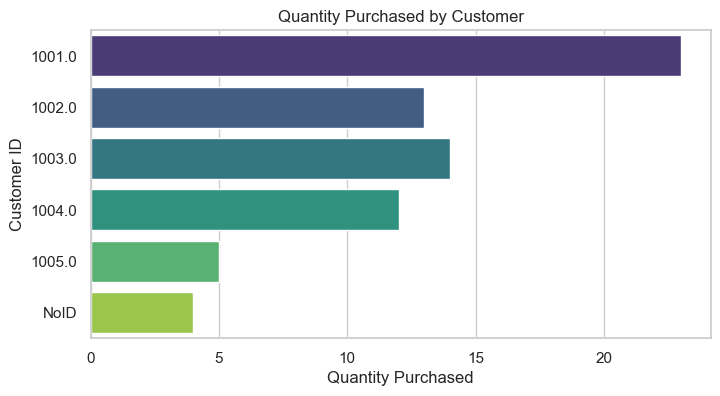

In [52]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Quantity', y='CustomerID', data=customer_summary, palette='viridis')
plt.xlabel('Quantity Purchased')
plt.ylabel('Customer ID')
plt.title('Quantity Purchased by Customer')
plt.show()

Identifying linearity:

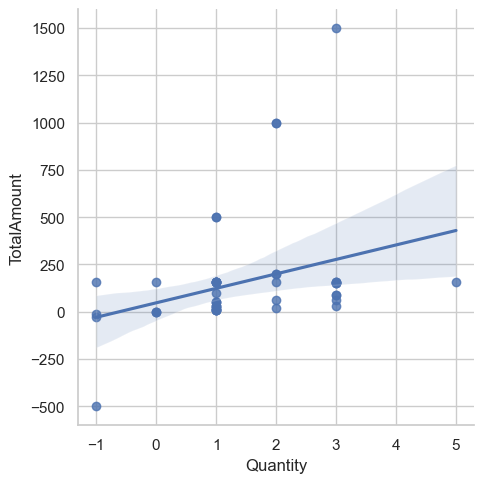

In [53]:
sns.lmplot(x='Quantity', y='TotalAmount', data=df)
plt.show()

The blue line represents the linear projection and the shaded area represents the confidence interval, indicating the uncertainty of the projection.